## InClass

#### import required libraries

In [1]:
import numpy                      as np
import pandas                     as pd
import matplotlib.pyplot          as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from statsmodels.tsa.seasonal     import seasonal_decompose, STL

#### Read Petrol. csv file

In [43]:
df1=pd.read_csv('Petrol.csv')
df1.head()

,Year,Quarter,Consumption
0,2001,Q1,14.978
1,2001,Q2,11.099
2,2001,Q3,10.057
3,2001,Q4,10.454
4,2002,Q1,9.295


In [44]:
date=pd.date_range(start='3/30/2001',end='9/30/2013',freq='Q')


#### convert the given data into time series

In [11]:
df1['Time_Stamp']=pd.DataFrame(date)
df1.set_index('Time_Stamp')
df1.drop(['Year','Quarter'],axis=1,inplace=True)


#### Plot the time series

<Axes: xlabel='Time_Stamp'>

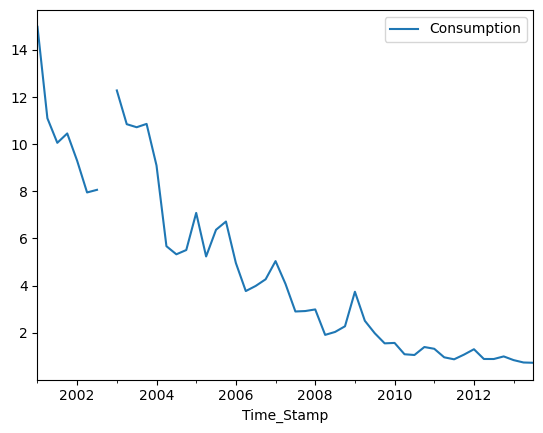

In [51]:
df1.plot()

#### fill the missing values using interpolation

In [53]:
df1.isnull().sum()

Consumption    1
dtype: int64

In [60]:
df1['Consumption'] = df1['Consumption'].interpolate(method='linear')

In [61]:
df1


,Consumption
Time_Stamp,
2001-03-31,14.97800
2001-06-30,11.09900
2001-09-30,10.05700
2001-12-31,10.45400
2002-03-31,9.29500
2002-06-30,7.95200
2002-09-30,8.06300
2002-12-31,10.17050
2003-03-31,12.27800


<Axes: xlabel='Time_Stamp'>

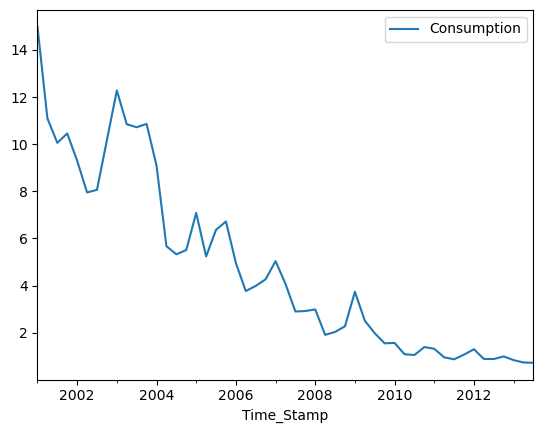

In [64]:
df1.plot()

In [65]:
df1.isnull().sum()

Consumption    0
dtype: int64

<Axes: xlabel='Time_Stamp'>

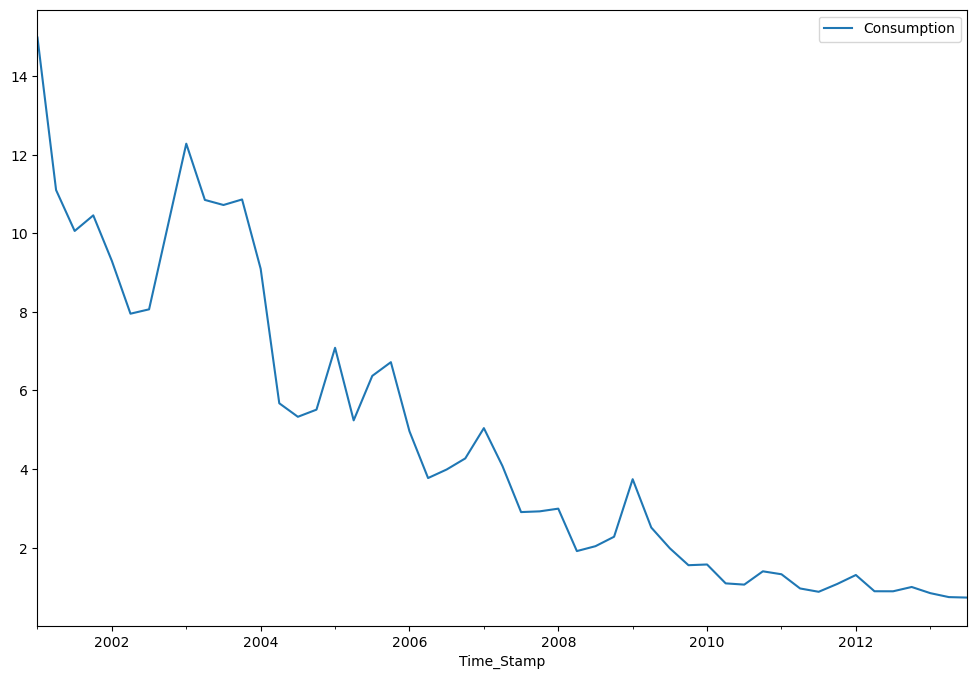

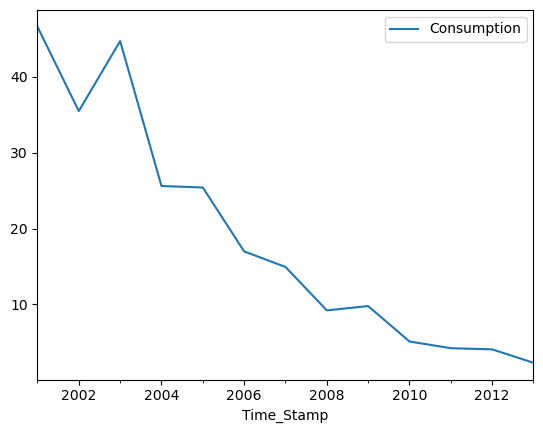

In [72]:
# checking resample 
df1.plot(figsize=(12,8))
df1_y=df1.resample('Y').sum()
df1_y.plot()

#### decompose the given time series and give your inference on whether the series is additive or multiplicative

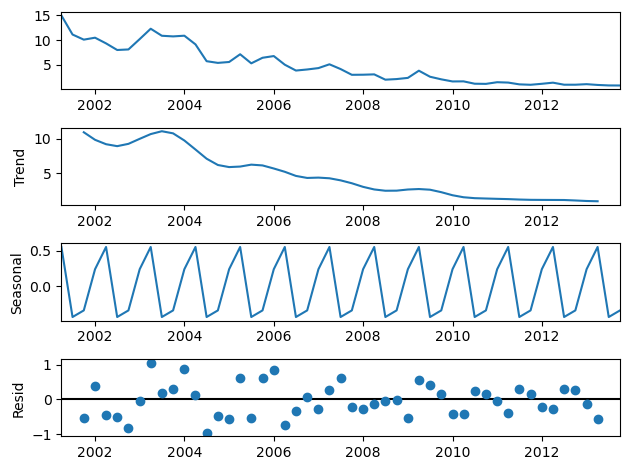

In [73]:
decomposition = seasonal_decompose(df1,model='additive')
decomposition.plot();

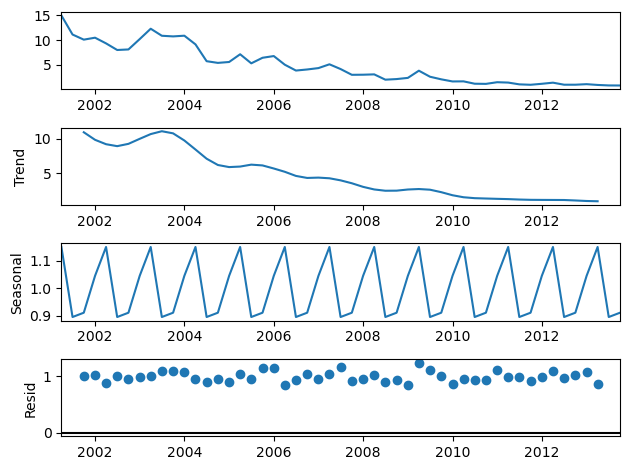

In [74]:
decomposition = seasonal_decompose(df1,model='multiplicative')
decomposition.plot();

In [75]:
## looks a good trend  and sesonality series is multiplicative res is almost constant

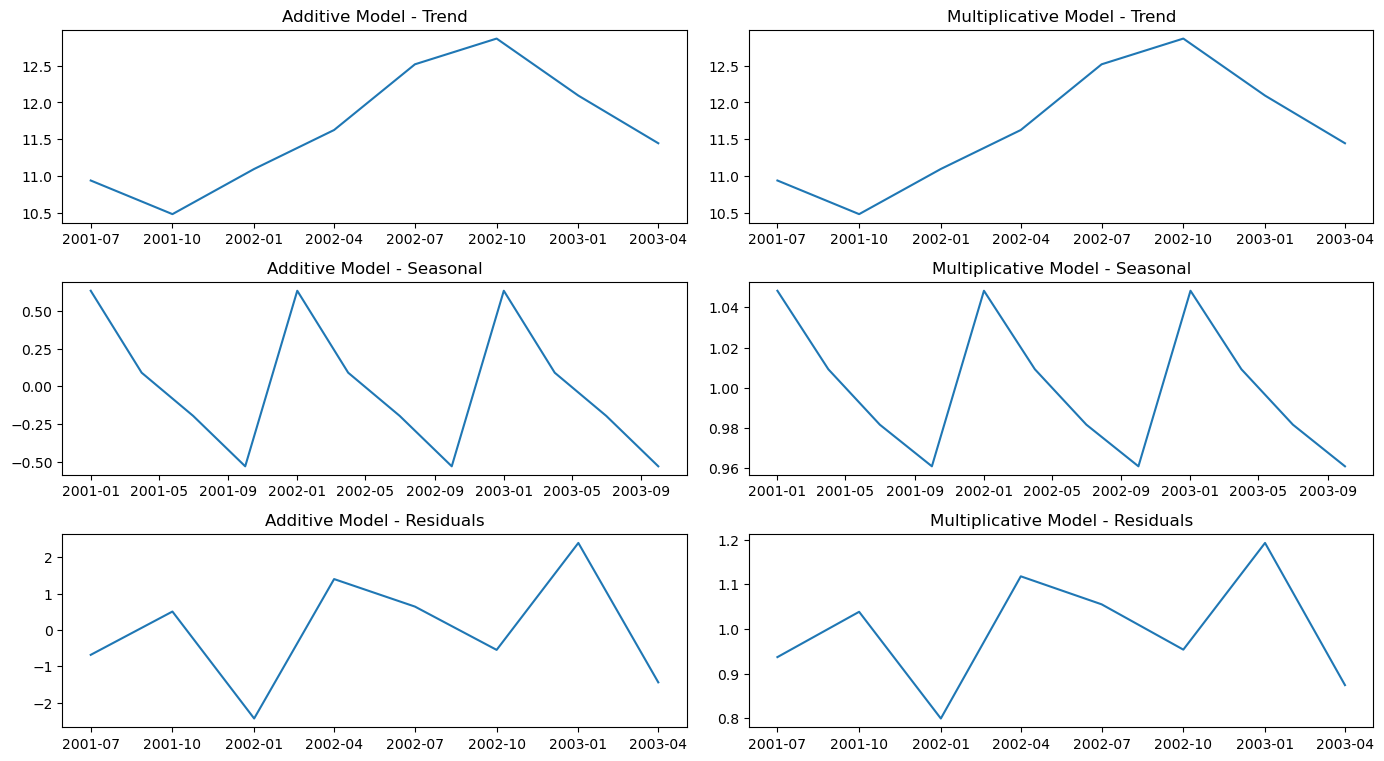

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Sample data
data = {
    'Year': [2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002, 2003, 2003, 2003, 2003],
    'Quarter': ['Q1', 'Q2', 'Q3', 'Q4', 'Q1', 'Q2', 'Q3', 'Q4', 'Q1', 'Q2', 'Q3', 'Q4'],
    'Consumption': [14.978, 11.099, 10.057, 10.454, 9.295, 13.114, 12.967, 11.793, 15.120, 10.095, 9.768, 9.795]
}

df = pd.DataFrame(data)

# Function to parse the year and quarter into a datetime object
def parse_date(year, quarter):
    quarter_to_month = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}
    return pd.to_datetime(f"{year}-{quarter_to_month[quarter]}-01")

# Apply the function to create a new Date column
df['Date'] = df.apply(lambda row: parse_date(row['Year'], row['Quarter']), axis=1)
df.set_index('Date', inplace=True)

# Decompose the time series
result_add = seasonal_decompose(df['Consumption'], model='additive', period=4)
result_mul = seasonal_decompose(df['Consumption'], model='multiplicative', period=4)

# Plot the decomposed components
plt.figure(figsize=(14, 10))

plt.subplot(4, 2, 1)
plt.plot(result_add.trend)
plt.title('Additive Model - Trend')

plt.subplot(4, 2, 2)
plt.plot(result_mul.trend)
plt.title('Multiplicative Model - Trend')

plt.subplot(4, 2, 3)
plt.plot(result_add.seasonal)
plt.title('Additive Model - Seasonal')

plt.subplot(4, 2, 4)
plt.plot(result_mul.seasonal)
plt.title('Multiplicative Model - Seasonal')

plt.subplot(4, 2, 5)
plt.plot(result_add.resid)
plt.title('Additive Model - Residuals')

plt.subplot(4, 2, 6)
plt.plot(result_mul.resid)
plt.title('Multiplicative Model - Residuals')

plt.tight_layout()
plt.show()
